In [10]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from pandas.io.html import read_html

region_file= os.path.join('..','Resources','region_vote_df.csv')
pop_file= os.path.join('..','Resources','2012-2017_Popn_Estimates.xlsx')
shapefile = os.path.join('..','Resources','NUTS_Level_1_January_2018_Ultra_Generalised_Clipped_Boundaries_in_the_United_Kingdom','NUTS_Level_1_January_2018_Ultra_Generalised_Clipped_Boundaries_in_the_United_Kingdom_WGS84')
wiki = "https://en.wikipedia.org/wiki/Regions_of_England"

region_index= {
    'East':'East of England',
    'East Midlands':'East Midlands (England)',
    'North East': 'North East (England)',
    'North West':'North West (England)',
    'South East': 'South East (England)',
    'South West':'South West (England)',
    'West Midlands': 'West Midlands (England)',
    'Yorkshire and the Humber': 'Yorkshire and The Humber'
    }
pop_index={
    'EAST': 'East',
    'EAST MIDLANDS': 'East Midlands',
    'LONDON': 'London',
    'NORTH EAST':'North East',
    'NORTH WEST':'North West',
    'NORTHERN IRELAND':'Northern Ireland',
    'SCOTLAND':'Scotland',
    'SOUTH EAST': 'South East',
    'SOUTH WEST': 'South West',
    'WALES':'Wales',
    'WEST MIDLANDS':'West Midlands',
    'YORKSHIRE AND THE HUMBER': 'Yorkshire and The Humber'
    }


def createDataSeries(columnname):
    series = region_df[columnname]
    series = series.rename(index=region_index)
    
    return series

def createMapObject(ax, title):
    m = Basemap(llcrnrlon=-10.5,llcrnrlat=49.5,urcrnrlon=3.5,urcrnrlat=59.5,
           resolution='i',projection='tmerc',lon_0=-4.36,lat_0=54.7,ax=ax)
    m.fillcontinents()
    m.ax.set_title(title, fontsize = 30)
    
    return m

def drawMap(m, fig, ax, shapefile, data, label, gradient='hot', ticks=None, tick_label=None):
    shp = m.readshapefile(shapefile, 'ukregion', drawbounds=False)
        
    norm = mpl.colors.Normalize(vmin=data.min(), vmax=data.max())
    cmap = gradient
    sm = cm.ScalarMappable(norm=norm, cmap=cmap)
    sm.set_array([])
    colors = []
    patches = []

    for nshape, seg in enumerate(m.ukregion):
        uf = m.ukregion_info[nshape]['nuts118nm']
        color  = sm.to_rgba(data[uf])
        poly = Polygon(seg, facecolor=color, edgecolor='white')
        m.ax.add_patch(poly)
        patches.append(poly)
        colors.append(color)

    p = PatchCollection(patches, cmap=cmap)
    p.set_array(np.array(colors))
    cb = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=.01, ticks=ticks)
    cb.set_label(label, fontsize=14)
    if tick_label:
        cb.ax.set_xticklabels(tick_label)

In [4]:
region_df = pd.read_csv(region_file)
region_df

,Region,Electorate,Pct_Turnout,Valid_Votes,Remain,Leave,Pct_Remain,Pct_Leave
0,East,4398796,3559.86,3328983,1448616,1880367,0.435153,0.564847
1,East Midlands,3384299,3018.09,2508515,1033036,1475479,0.411812,0.588188
2,London,5424768,2303.97,3776751,2263519,1513232,0.599330,0.400670
3,North East,1934341,829.57,1340698,562595,778103,0.419628,0.580372
4,North West,5241568,2758.82,3665945,1699020,1966925,0.463460,0.536540
5,Northern Ireland,1260955,62.69,790149,440707,349442,0.557752,0.442248
6,Scotland,3987112,2195.87,2679513,1661191,1018322,0.619960,0.380040
7,South East,6465404,5162.38,4959683,2391718,2567965,0.482232,0.517768
8,South West,4138134,2945.16,3172730,1503019,1669711,0.473731,0.526269
9,Wales,2270272,1583.18,1626919,772347,854572,0.474730,0.525270


In [5]:
wikitables = read_html(wiki,header=0, index_col=0, attrs={"class":"wikitable"})
region_table = wikitables[0]
region_table = region_table.rename(index={
    'East of England':'East',
    'Yorkshire and the Humber':'Yorkshire and The Humber'
})
region_table['Name'] = region_table.index
region_table.columns =['Population', '10 yr increase', 'Area sqkm', 'Pop Density', 'Median gross', 'a','b','c','Name']
region_table = region_table[['Name', 'Pop Density']]
row_list = [{
    'Name':'Scotland',
    'Pop Density': 68.21
    },
    {
    'Name':'Wales',
    'Pop Density': 149.15
    },
    {
    'Name':'Northern Ireland',
    'Pop Density':133.76
    }
]
region_table = region_table.append(row_list)
region_df = region_df.merge(region_table[["Name","Pop Density"]][:], how="inner", left_on="Region", right_on="Name")
region_df = region_df.drop(['Name'], axis=1)

In [6]:
pop_df = pd.read_excel(pop_file,skiprows=4,sheet_name="MYE2 - 2015 All")

In [7]:
pop_df = pop_df.replace(pop_index)
region_df = region_df.merge(pop_df[["Name","All ages"]][:], how="inner", left_on="Region", right_on="Name")
region_df

,Region,Electorate,Pct_Turnout,Valid_Votes,Remain,Leave,Pct_Remain,Pct_Leave,Pop Density,Name,All ages
0,East,4398796,3559.86,3328983,1448616,1880367,0.435153,0.564847,305.80,East,6075970
1,East Midlands,3384299,3018.09,2508515,1033036,1475479,0.411812,0.588188,290.09,East Midlands,4677425
2,London,5424768,2303.97,3776751,2263519,1513232,0.599330,0.400670,5199.71,London,8666930
3,North East,1934341,829.57,1340698,562595,778103,0.419628,0.580372,302.24,North East,2624579
4,North West,5241568,2758.82,3665945,1699020,1966925,0.463460,0.536540,497.86,North West,7175178
5,Northern Ireland,1260955,62.69,790149,440707,349442,0.557752,0.442248,133.76,Northern Ireland,1851621
6,Scotland,3987112,2195.87,2679513,1661191,1018322,0.619960,0.380040,68.21,Scotland,5373000
7,South East,6465404,5162.38,4959683,2391718,2567965,0.482232,0.517768,452.20,South East,8949392
8,South West,4138134,2945.16,3172730,1503019,1669711,0.473731,0.526269,221.95,South West,5471610
9,Wales,2270272,1583.18,1626919,772347,854572,0.474730,0.525270,149.15,Wales,3099086


In [8]:
region_df = region_df.drop(['Name'], axis=1)
columns = {
    "Area" : "District",
    "All ages": "Total Pop"
}
region_df = region_df.rename(index=str, columns =columns)
region_df = region_df.set_index('Region')

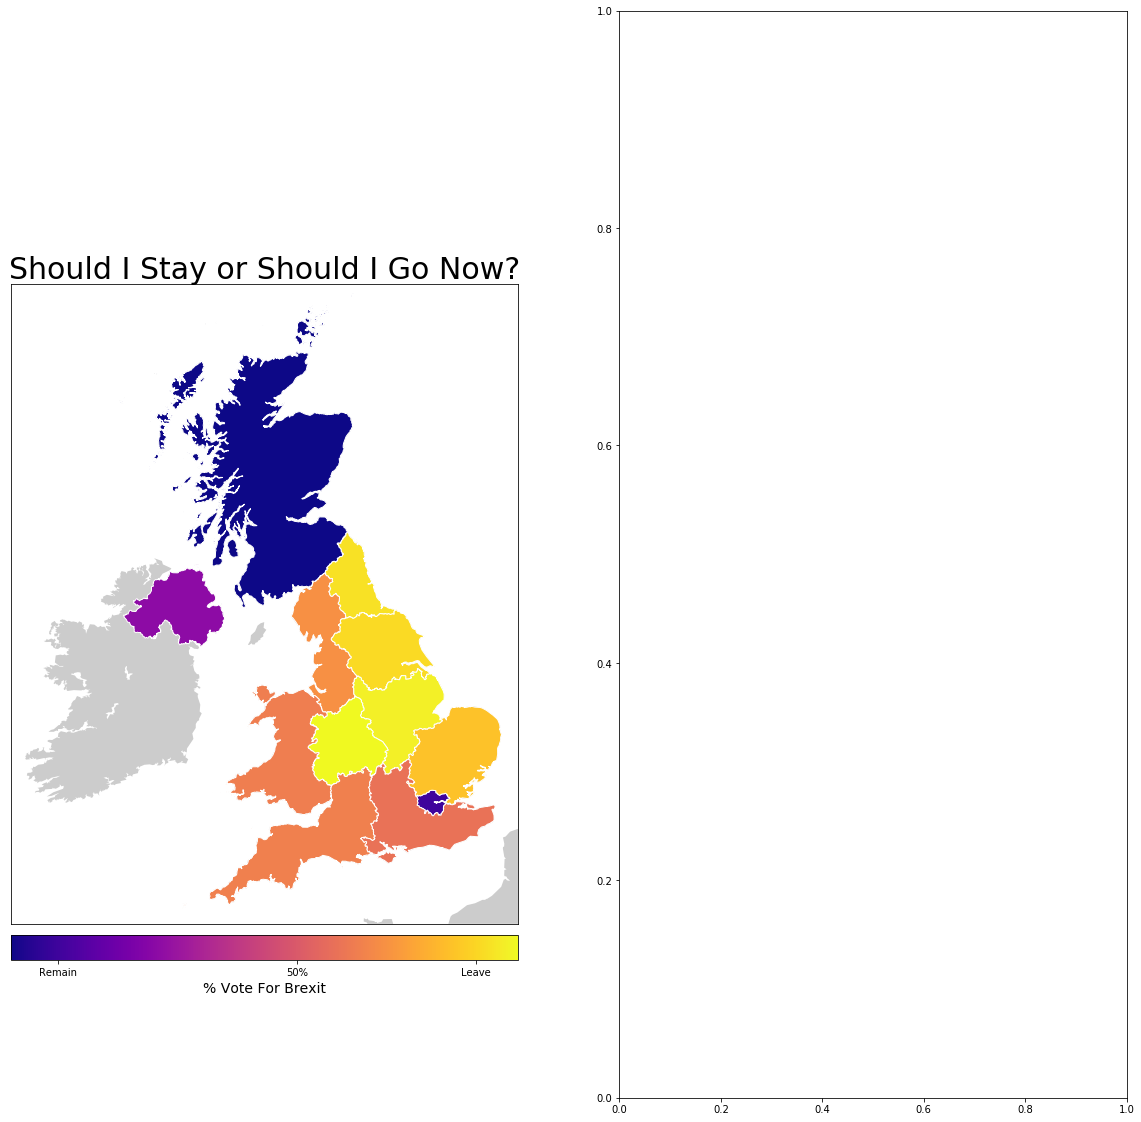

In [11]:
region_vote = createDataSeries('Pct_Leave')

fig, axes = plt.subplots(1, 2, figsize=[20,20])
vote_map = createMapObject(axes[0], "Should I Stay or Should I Go Now?")


ticks = [.400,.500, .575]
tick_labels = ['Remain','50%','Leave']
drawMap(vote_map, fig, vote_map.ax, shapefile, region_vote, '% Vote For Brexit' ,'plasma', ticks, tick_labels)

fig.savefig('../Visualizations/vote_map.png')

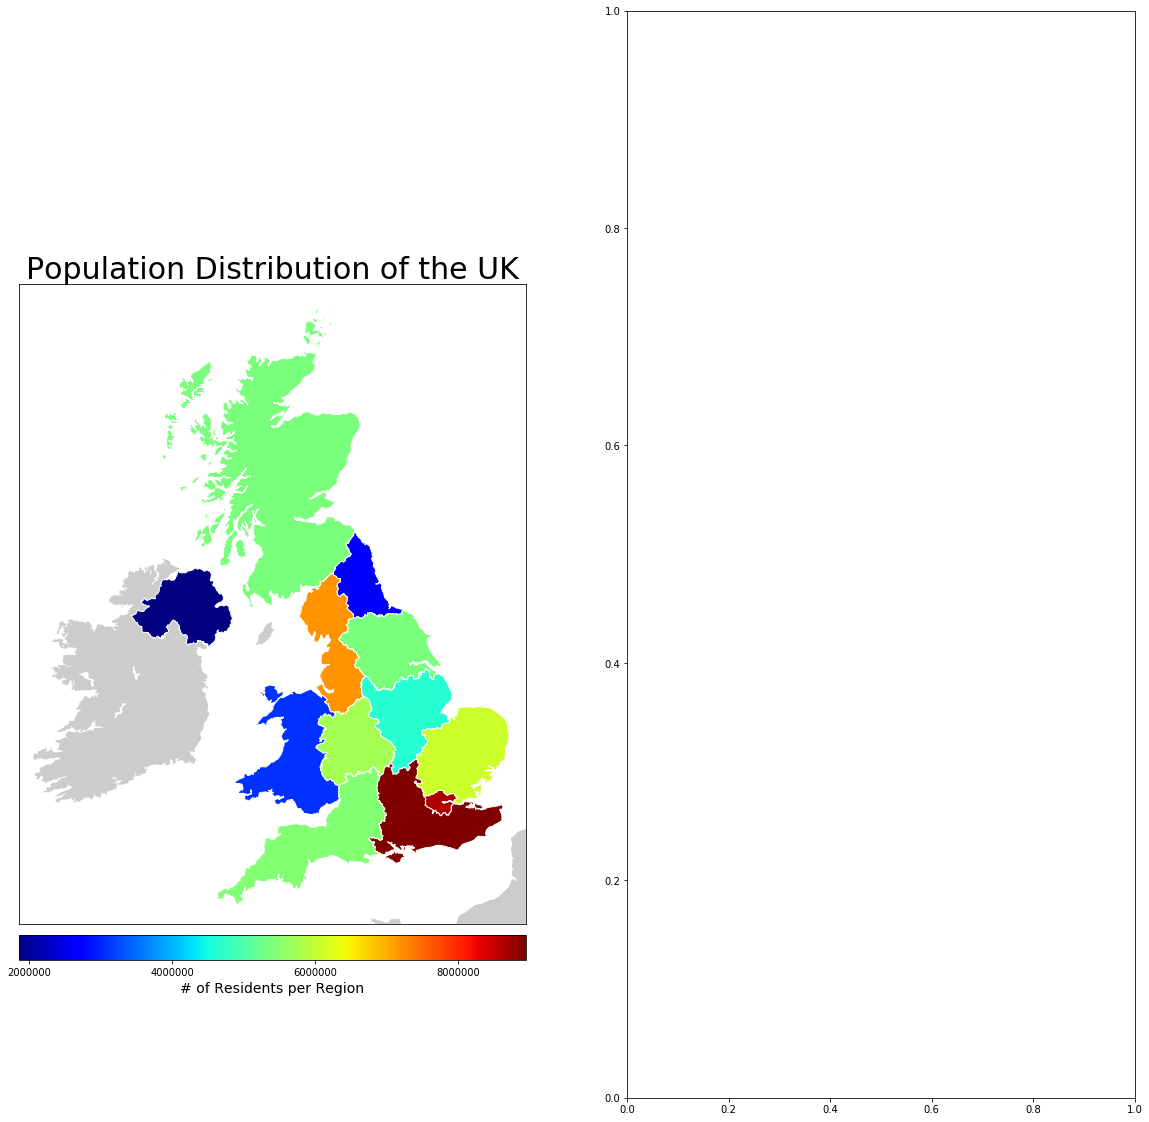

In [12]:
region_pop = createDataSeries('Total Pop')

fig, axes = plt.subplots(1, 2, figsize=[20,20])
pop_map = createMapObject(axes[0], "Population Distribution of the UK")
ticks = [2000000,4000000,6000000,8000000]
drawMap(pop_map, fig, pop_map.ax, shapefile, region_pop, '# of Residents per Region', 'jet', ticks)

fig.savefig('../Visualizations/pop_map.png')

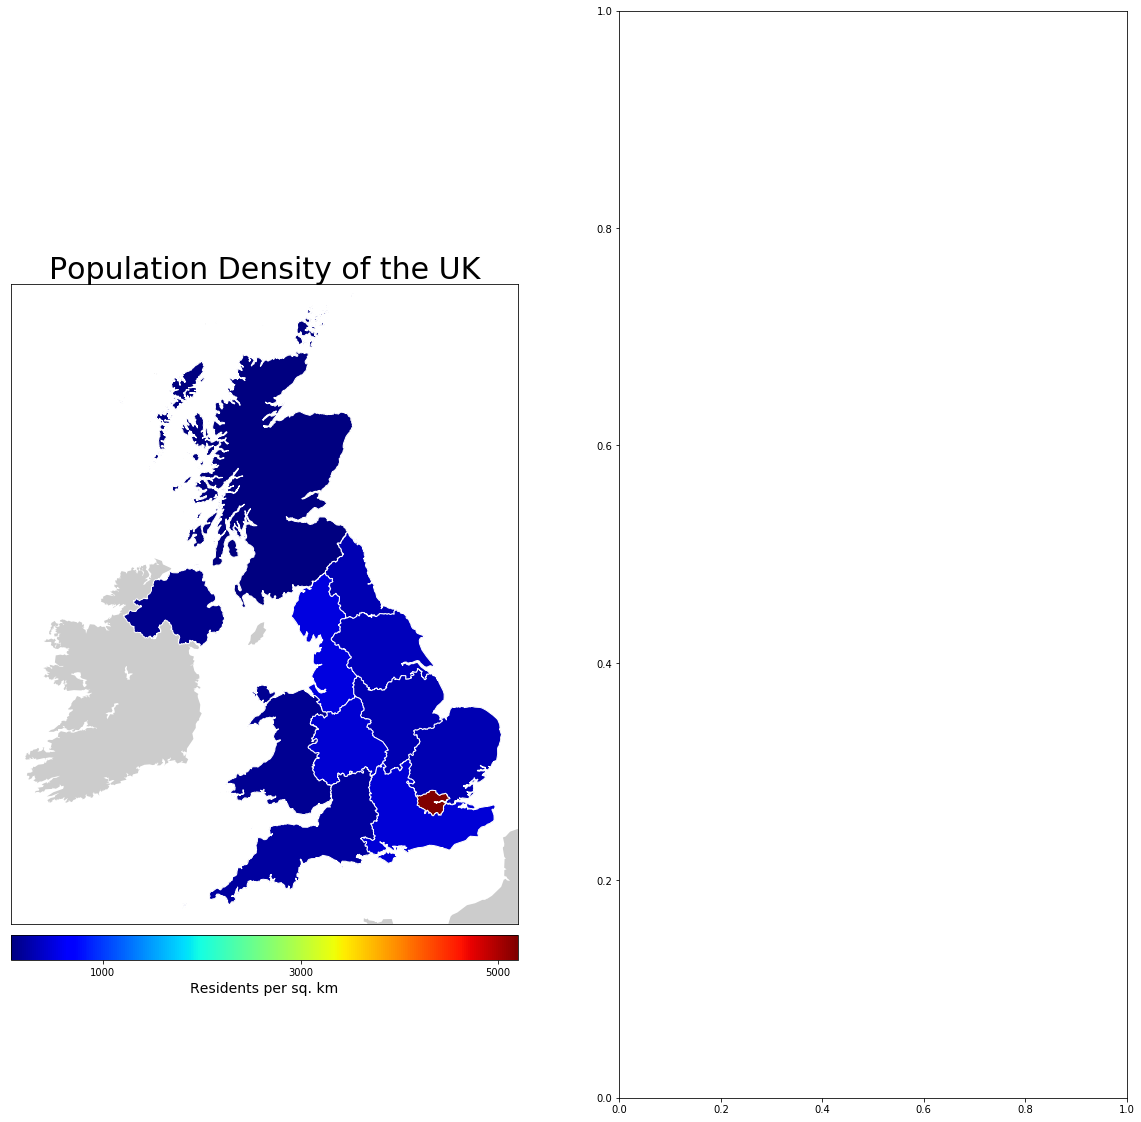

In [13]:
region_density = createDataSeries('Pop Density')

fig, axes = plt.subplots(1, 2, figsize=[20,20])
dense_map = createMapObject(axes[0], "Population Density of the UK")
ticks = [1000,3000,5000]
drawMap(dense_map, fig, dense_map.ax, shapefile, region_density, 'Residents per sq. km', 'jet', ticks)

fig.savefig('../Visualizations/dense_map.png')

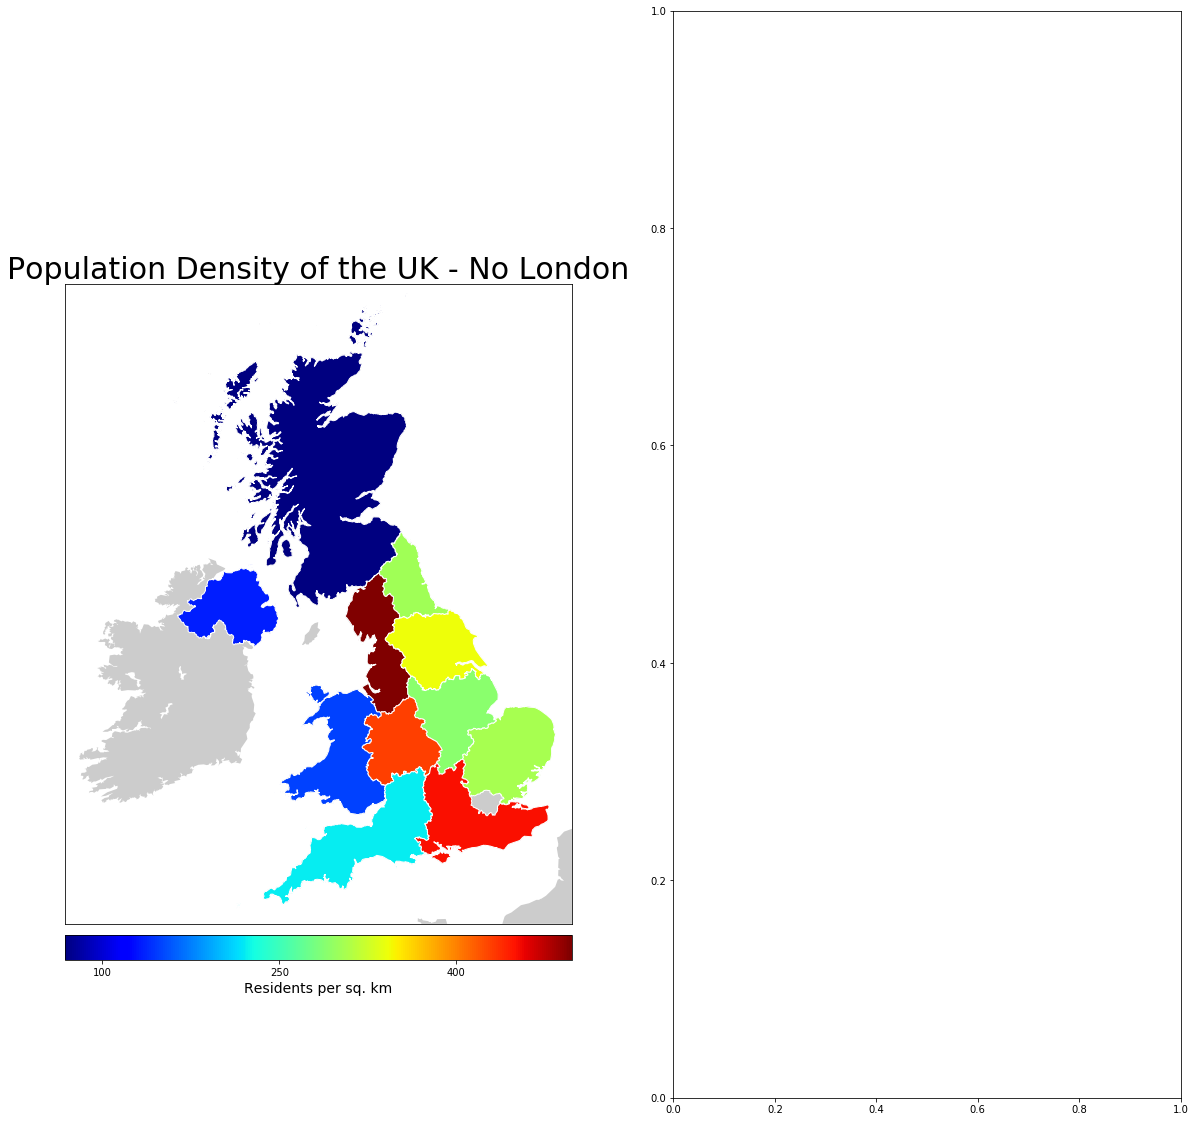

In [15]:
region_density = createDataSeries('Pop Density')
region_density.drop('London', inplace=True)
region_density

fig, axes = plt.subplots(1, 2, figsize=[20,20])
dense_map = createMapObject(axes[0], "Population Density of the UK - No London")
ticks = [100,250,400]


shp = dense_map.readshapefile(shapefile, 'ukregion', drawbounds=False)

norm = mpl.colors.Normalize(vmin=region_density.min(), vmax=region_density.max())
cmap = cm.jet
sm = cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
colors = []
patches = []

for nshape, seg in enumerate(dense_map.ukregion):
    uf = dense_map.ukregion_info[nshape]['nuts118nm']
    if uf != 'London':
        color  = sm.to_rgba(region_density[uf])
        poly = Polygon(seg, facecolor=color, edgecolor='white')
        dense_map.ax.add_patch(poly)
        patches.append(poly)
        colors.append(color)

p = PatchCollection(patches, cmap=cmap)
p.set_array(np.array(colors))
cb = fig.colorbar(sm, ax=dense_map.ax, orientation='horizontal', pad=.01, ticks=ticks)
cb.set_label('Residents per sq. km', fontsize=14)


fig.savefig('../Visualizations/noLondon_map.png')